<a href="https://colab.research.google.com/github/anthonymoisan/Predict_Bicycle/blob/master/src/project_bicycle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description du projet

Le projet consiste à prévoir le prix de maisons en fonction d'un certain nombre de caractéristiques. Ce projet est issu d'un défi Kaggle que l'on peut retrouver [ici](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data "Link to Kaggle").

L'objectif de ce projet sera :
* de comprendre les variables explicatives et la variable cible en faisant une analyse exploratoire des données
* de définir un premier modèle qui sera dans le cas présent une régression linéaire
* de mettre en place un réseau de neurones
* de faire une analyse comparative entre les deux modèles

# Type de problème
On est typiquement dans une problématique de régression dans le cas d'un apprentissage supervisé.

# Librairies

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# impossibilité de voir l'arbre de décision à travers graphviz!pip install graphviz

# Lecture du jeu de données



## Taille du jeu de données

In [2]:
df = pd.read_csv("../input/train.csv")
print("taille du jeu de donnees :", df.shape)
df.head(10)

taille du jeu de donnees : (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


On regarde les informations assez rapidement sur les variables

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## Gestion des variables catégorielles
On regarde les valeurs uniques pour identifier les variables catégorielles

In [4]:
for colname, serie in df.iteritems():
    print(colname + " has " + str(serie.drop_duplicates().shape[0]) + " unique values.")

Id has 1460 unique values.
MSSubClass has 15 unique values.
MSZoning has 5 unique values.
LotFrontage has 111 unique values.
LotArea has 1073 unique values.
Street has 2 unique values.
Alley has 3 unique values.
LotShape has 4 unique values.
LandContour has 4 unique values.
Utilities has 2 unique values.
LotConfig has 5 unique values.
LandSlope has 3 unique values.
Neighborhood has 25 unique values.
Condition1 has 9 unique values.
Condition2 has 8 unique values.
BldgType has 5 unique values.
HouseStyle has 8 unique values.
OverallQual has 10 unique values.
OverallCond has 9 unique values.
YearBuilt has 112 unique values.
YearRemodAdd has 61 unique values.
RoofStyle has 6 unique values.
RoofMatl has 8 unique values.
Exterior1st has 15 unique values.
Exterior2nd has 16 unique values.
MasVnrType has 5 unique values.
MasVnrArea has 328 unique values.
ExterQual has 4 unique values.
ExterCond has 5 unique values.
Foundation has 6 unique values.
BsmtQual has 5 unique values.
BsmtCond has 5 un

A la vue du fichier de description, qui est aussi confirmée par le nombre de modalités, un certain nombre de variables peuvent être redéfinies en variables catégorielles. Initialement, on avait décidé de remettre les noms longs des modalités mais les graphiques n'étaient plus par la suite lisibles.

In [5]:
dictMSSubClass = {
20: '1-STORY 1946 & NEWER ALL STYLES',
30: '1-STORY 1945 & OLDER',
40: '1-STORY W/FINISHED ATTIC ALL AGES',
45: '1-1/2 STORY - UNFINISHED ALL AGES',
50: '1-1/2 STORY FINISHED ALL AGES',
60: '2-STORY 1946 & NEWER',
70: '2-STORY 1945 & OLDER',
75: '2-1/2 STORY ALL AGES',
80: 'SPLIT OR MULTI-LEVEL',
85: 'SPLIT FOYER',
90: 'DUPLEX - ALL STYLES AND AGES',
120: '1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
150: '1-1/2 STORY PUD - ALL AGES',
160: '2-STORY PUD - 1946 & NEWER',
180: 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
190: '2 FAMILY CONVERSION - ALL STYLES AND AGES'}
"""df["MSSubClass"] = pd.Categorical(df["MSSubClass"], ordered=False).rename_categories(dictMSSubClass)"""
df["MSSubClass"] = pd.Categorical(df["MSSubClass"], ordered=False)

dictMSZoning = {
'A': 'Agriculture',
'C': 'Commercial',
'FV': 'Floating Village Residential',
'I': 'Industrial',
'RH': 'Residential High Density',
'RL': 'Residential Low Density',
'RP': 'Residential Low Density Park', 
'RM': 'Residential Medium Density'
}
"""df["MSZoning"] = pd.Categorical(df["MSZoning"], ordered=False).rename_categories(dictMSZoning)"""
df["MSZoning"] = pd.Categorical(df["MSZoning"], ordered=False)

df["Street"] = pd.Categorical(df["Street"], ordered=False).rename_categories({'Grvl':'Gravel','Pave':'Paved'})

df["Alley"].fillna('No alley access', inplace = True)
df["Alley"] = pd.Categorical(df["Alley"], ordered=False).rename_categories({'Grvl':'Gravel','Pave':'Paved'})

"""df["LotShape"] = pd.Categorical(df["LotShape"], ordered=False).rename_categories({'Reg':'Regular', 'IR1':'Slightly irregular', 'IR2': 'Moderately Irregular', 'IR3':'Irregular'})"""
df["LotShape"] = pd.Categorical(df["LotShape"], ordered=False)

"""df["LandContour"] = pd.Categorical(df["LandContour"], ordered=False).rename_categories({'Lvl':'Near Flat/Level','Bnk':'Banked - Quick and significant rise from street grade to building','HLS':'Hillside - Significant slope from side to side','Low':'Depression'})"""
df["LandContour"] = pd.Categorical(df["LandContour"], ordered=False)

"""df["Utilities"] = pd.Categorical(df["Utilities"], ordered=False).rename_categories({'AllPub':'All public Utilities (E,G,W,& S)','NoSewr':'Electricity, Gas, and Water (Septic Tank)','NoSeWa':'Electricity and Gas Only','ELO':'Electricity only'})"""
df["Utilities"] = pd.Categorical(df["Utilities"], ordered=False)

"""df["LotConfig"] = pd.Categorical(df["LotConfig"], ordered=False).rename_categories({'Inside':'Inside lot','Corner':'Corner lot','CulDSac':'Cul-de-sac','FR2':'Frontage on 2 sides of property','FR3':'Frontage on 3 sides of property'})"""
df["LotConfig"] = pd.Categorical(df["LotConfig"], ordered=False)

"""df["LandSlope"] = pd.Categorical(df["LandSlope"], ordered=False).rename_categories({'Gtl': 'Gentle slope','Mod':'Moderate Slope','Sev':'Severe Slope'})"""
df["LandSlope"] = pd.Categorical(df["LandSlope"], ordered=False)
dictNeigh = {
'Blmngtn':'Bloomington Heights',
'Blueste':'Bluestem',
'BrDale':'Briardale',
'BrkSide':'Brookside',
'ClearCr':'Clear Creek',
'CollgCr':'College Creek',
'Crawfor':'Crawford',
'Edwards':'Edwards',
'Gilbert':'Gilbert',
'IDOTRR':'Iowa DOT and Rail Road',
'MeadowV':'Meadow Village',
'Mitchel':'Mitchell',
'Names':'North Ames',
'NoRidge':'Northridge',
'NPkVill':'Northpark Villa',
'NridgHt':'Northridge Heights',
'NWAmes':'Northwest Ames',
'OldTown':'Old Town',
'SWISU':'South & West of Iowa State University',
'Sawyer':'Sawyer',
'SawyerW':'Sawyer West',
'Somerst':'Somerset',
'StoneBr':'Stone Brook',
'Timber':'Timberland',
'Veenker':'Veenker',
}
"""df["Neighborhood"] = pd.Categorical(df["Neighborhood"], ordered=False).rename_categories(dictNeigh)"""
df["Neighborhood"] = pd.Categorical(df["Neighborhood"], ordered=False)

dictCondition = {
'Artery':'Adjacent to arterial street',
'Feedr':'Adjacent to feeder street',
'Norm':'Normal',
'RRNn':'Within 200 of North-South Railroad',
'RRAn':'Adjacent to North-South Railroad',
'PosN':'Near positive off-site feature--park, greenbelt, etc.',
'PosA': 'Adjacent to postive off-site feature',
'RRNe' :'Within 200 of East-West Railroad',
'RRAe': 'Adjacent to East-West Railroad' }
"""df["Condition1"] = pd.Categorical(df["Condition1"], ordered=False).rename_categories(dictCondition)"""
df["Condition1"] = pd.Categorical(df["Condition1"], ordered=False)

"""df["Condition2"] = pd.Categorical(df["Condition2"], ordered=False).rename_categories(dictCondition)"""
df["Condition2"] = pd.Categorical(df["Condition2"], ordered=False)

dictTypeDwelling = {
'1Fam':'Single-family Detached',
'2FmCon': 'Two-family Conversion; originally built as one-family dwelling',
'Duplx':'Duplex',
'TwnhsE':'Townhouse End Unit',
'TwnhsI':'Townhouse Inside Unit'}

"""df["BldgType"] = pd.Categorical(df["BldgType"], ordered=False).rename_categories(dictTypeDwelling)"""
df["BldgType"] = pd.Categorical(df["BldgType"], ordered=False)

dictSytleDwelling = {
'1Story':'One story',
'1.5Fin':'One and one-half story: 2nd level finished',
'1.5Unf':'One and one-half story: 2nd level unfinished',
'2Story':'Two story',
'2.5Fin':'Two and one-half story: 2nd level finished',
'2.5Unf':'Two and one-half story: 2nd level unfinished',
'SFoyer': 'Split Foyer',
'SLvl': 'Split Level'}

"""df["HouseStyle"] = pd.Categorical(df["HouseStyle"], ordered=False).rename_categories(dictSytleDwelling)"""
df["HouseStyle"] = pd.Categorical(df["HouseStyle"], ordered=False)

dictOverallQual = {
10:'Very Excellent',
9:'Excellent',
8:'Very Good',
7:'Good',
6:'Above Average',
5:'Average',
4:'Below Average',
3:'Fair',
2:'Poor',
1:'Very Poor'}
"""df["OverallQual"] = pd.Categorical(df["OverallQual"], ordered=True).rename_categories(dictOverallQual)"""
"""df["OverallCond"] = pd.Categorical(df["OverallCond"], ordered=True).rename_categories(dictOverallQual)"""
df["OverallQual"] = pd.Categorical(df["OverallQual"], ordered=True)
df["OverallCond"] = pd.Categorical(df["OverallCond"], ordered=True)

dictRoofStyle = {
'Flat':'Flat',
'Gable':'Gable',
'Gambrel':'Gabrel (Barn)',
'Hip':'Hip',
'Mansard':'Mansard',
'Shed':'Shed'}
"""df["RoofStyle"] = pd.Categorical(df["RoofStyle"], ordered=False).rename_categories(dictRoofStyle)"""
df["RoofStyle"] = pd.Categorical(df["RoofStyle"], ordered=False)
    
dictRoofMatl = {
'ClyTile': 'Clay or Tile',
'CompShg': 'Standard (Composite) Shingle',
'Membran': 'Membrane',
'Metal': 'Metal',
'Roll': 'Roll',
'Tar&Grv': 'Gravel & Tar',
'WdShake': 'Wood Shakes',
'WdShngl': 'Wood Shingles'
}
"""df["RoofMatl"] = pd.Categorical(df["RoofMatl"], ordered=False).rename_categories(dictRoofMatl)"""
df["RoofMatl"] = pd.Categorical(df["RoofMatl"], ordered=False)

dictExterior = {
'AsbShng': 'Asbestos Shingles',
'AsphShn': 'Asphalt Shingles',
'BrkComm': 'Brick Common',
'BrkFace': 'Brick Face',
'CBlock': 'Cinder Block',
'CemntBd': 'Cement Board',
'HdBoard': 'Hard Board',
'ImStucc': 'Imitation Stucco',
'MetalSd': 'Metal Siding',
'Other': 'Other',
'Plywood': 'Plywood',
'PreCast': 'PreCast',
'Stone': 'Stone',
'Stucco': 'Stucco',
'VinylSd': 'Vinyl Siding',
'Wd Sdng': 'Wood Siding',
'WdShing': 'Wood Shingles'
}

"""df["Exterior1st"] = pd.Categorical(df["Exterior1st"], ordered=False).rename_categories(dictExterior)
df["Exterior2nd"] = pd.Categorical(df["Exterior2nd"], ordered=False).rename_categories(dictExterior)"""
df["Exterior1st"] = pd.Categorical(df["Exterior1st"], ordered=False)
df["Exterior2nd"] = pd.Categorical(df["Exterior2nd"], ordered=False)

dictMasVnrType = {
'BrkCmn':'Brick Common',
'BrkFace':'Brick Face',
'CBlock':'Cinder Block',
'None':'None',
'Stone': 'Stone'}
"""df["MasVnrType"] = pd.Categorical(df["MasVnrType"], ordered=False).rename_categories(dictMasVnrType)"""
df["MasVnrType"] = pd.Categorical(df["MasVnrType"], ordered=False)

dictExterQual = {
'Ex':'Excellent',
'Gd':'Good',
'TA':'Average/Typical',
'Fa':'Fair',
'Po':'Poor'}
"""df["ExterQual"] = pd.Categorical(df["ExterQual"], ordered=True).rename_categories(dictExterQual)
df["ExterCond"] = pd.Categorical(df["ExterCond"], ordered=True).rename_categories(dictExterQual)"""
df["ExterQual"] = pd.Categorical(df["ExterQual"], ordered=True)
df["ExterCond"] = pd.Categorical(df["ExterCond"], ordered=True)

dictFoundation = {
'BrkTil':'Brick & Tile',
'CBlock': 'Cinder Block',
'PConc': 'Poured Contrete',
'Slab':'Slab',
'Stone':'Stone',
'Wood':'Wood'}
"""df["Foundation"] = pd.Categorical(df["Foundation"], ordered=False).rename_categories(dictFoundation)"""
df["Foundation"] = pd.Categorical(df["Foundation"], ordered=False)

dictBsmtQual = {
'Ex':'Excellent (100+ inches)',
'Gd':'Good (90-99 inches)',
'TA':'Typical (80-89 inches)',
'Fa':'Fair (70-79 inches)',
'Po':'Poor (<70 inches'}
df["BsmtQual"].fillna("No Basement", inplace=True)
"""df["BsmtQual"] = pd.Categorical(df["BsmtQual"], ordered=True).rename_categories(dictBsmtQual)"""
df["BsmtQual"] = pd.Categorical(df["BsmtQual"], ordered=True)

dictBsmtCond = {
'Ex':'Excellent',
'Gd':'Good',
'TA':'Typical - slight dampness allowed',
'Fa':'Fair - dampness or some cracking or settling',
'Po':'Poor - Severe cracking, settling, or wetness'}
df["BsmtCond"].fillna("No Basement", inplace=True)
"""df["BsmtCond"] = pd.Categorical(df["BsmtCond"], ordered=True).rename_categories(dictBsmtCond)"""
df["BsmtCond"] = pd.Categorical(df["BsmtCond"], ordered=True)

dictBsmtExposure = {
'Gd':'Good Exposure',
'Av':'Average Exposure (split levels or foyers typically score average or above)',
'Mn':'Mimimum Exposure',
'No': 'No Exposure'}
df["BsmtExposure"].fillna("No Basement", inplace=True)
"""df["BsmtExposure"] = pd.Categorical(df["BsmtExposure"], ordered=True).rename_categories(dictBsmtExposure)"""
df["BsmtExposure"] = pd.Categorical(df["BsmtExposure"], ordered=True)

dictBsmtFinType = {
'GLQ':'Good Living Quarters',
'ALQ':'Average Living Quarters',
'BLQ':'Below Average Living Quarters',
'Rec':'Average Rec Room',
'LwQ':'Low Quality',
'Unf':'Unfinshed'}
df["BsmtFinType1"].fillna("No Basement", inplace=True)
df["BsmtFinType2"].fillna("No Basement", inplace=True)
"""df["BsmtFinType1"] = pd.Categorical(df["BsmtFinType1"], ordered=True).rename_categories(dictBsmtFinType)
df["BsmtFinType2"] = pd.Categorical(df["BsmtFinType2"], ordered=True).rename_categories(dictBsmtFinType)"""
df["BsmtFinType1"] = pd.Categorical(df["BsmtFinType1"], ordered=True)
df["BsmtFinType2"] = pd.Categorical(df["BsmtFinType2"], ordered=True)

dictHeating = {
'Floor':'Floor Furnace',
'GasA':'Gas forced warm air furnace',
'GasW':'Gas hot water or steam heat',
'Grav':'Gravity furnace',
'OthW':'Hot water or steam heat other than gas',
'Wall':'Wall furnace'}
"""df["Heating"] = pd.Categorical(df["Heating"], ordered=False).rename_categories(dictHeating)"""
df["Heating"] = pd.Categorical(df["Heating"], ordered=False)

dictHeatingQC = {
'Ex':'Excellent',
'Gd':'Good',
'TA':'Average/Typical',
'Fa':'Fair',
'Po':'Poor'}
"""df["HeatingQC"] = pd.Categorical(df["HeatingQC"], ordered=True).rename_categories(dictHeatingQC)"""
df["HeatingQC"] = pd.Categorical(df["HeatingQC"], ordered=True)

df["CentralAir"] = pd.Categorical(df["CentralAir"], ordered=False).rename_categories({'N': 'No', 'Y':'Yes'})

dictElectrical = {
'SBrkr':'Standard Circuit Breakers & Romex',
'FuseA': 'Fuse Box over 60 AMP and all Romex wiring (Average)',
'FuseF': '60 AMP Fuse Box and mostly Romex wiring (Fair)',
'FuseP': '60 AMP Fuse Box and mostly knob & tube wiring (poor)',
'Mix':'Mixed'}
"""df["Electrical"] = pd.Categorical(df["Electrical"], ordered=False).rename_categories(dictElectrical)"""
df["Electrical"] = pd.Categorical(df["Electrical"], ordered=False)

dictKitchenQual = {
'Ex':'Excellent',
'Gd':'Good',
'TA':'Typical/Average',
'Fa':'Fair',
'Po':'Poor'}
"""df["KitchenQual"] = pd.Categorical(df["KitchenQual"], ordered=True).rename_categories(dictKitchenQual)"""
df["KitchenQual"] = pd.Categorical(df["KitchenQual"], ordered=True)

dictFunctional = {
'Typ':'Typical Functionality',
'Min1':'Minor Deductions 1',
'Min2':'Minor Deductions 2',
'Mod':'Moderate Deductions',
'Maj1':'Major Deductions 1',
'Maj2':'Major Deductions 2',
'Sev':'Severely Damaged',
'Sal':'Salvage only'}
"""df["Functional"] = pd.Categorical(df["Functional"], ordered=True).rename_categories(dictFunctional)"""
df["Functional"] = pd.Categorical(df["Functional"], ordered=True)

dictFireplaceQu = {
'Ex':'Excellent - Exceptional Masonry Fireplace',
'Gd':'Good - Masonry Fireplace in main level',
'TA':'Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement',
'Fa':'Fair - Prefabricated Fireplace in basement',
'Po':'Poor - Ben Franklin Stove'}
df["FireplaceQu"].fillna("No Fireplace", inplace=True)
"""df["FireplaceQu"] = pd.Categorical(df["FireplaceQu"], ordered=True).rename_categories(dictFireplaceQu)"""
df["FireplaceQu"] = pd.Categorical(df["FireplaceQu"], ordered=True)

dictGarageType = {
'2Types':'More than one type of garage',
'Attchd':'Attached to home',
'Basment':'Basement Garage',
'BuiltIn':'Built-In (Garage part of house - typically has room above garage)',
'CarPort':'Car Port',
'Detchd':'Detached from home'}
df["GarageType"].fillna("No Garage", inplace=True)
"""df["GarageType"] = pd.Categorical(df["GarageType"], ordered=False).rename_categories(dictGarageType)"""
df["GarageType"] = pd.Categorical(df["GarageType"], ordered=False)

dictGarageFinish = {
'Fin':'Finished',
'RFn':'Rough Finished',
'Unf':'Unfinished'}
df["GarageFinish"].fillna("No Garage", inplace=True)
"""df["GarageFinish"] = pd.Categorical(df["GarageFinish"], ordered=False).rename_categories(dictGarageFinish)"""
df["GarageFinish"] = pd.Categorical(df["GarageFinish"], ordered=False)

dictGarageQual = {
'Ex':'Excellent',
'Gd':'Good',
'TA':'Typical/Average',
'Fa':'Fair',
'Po':'Poor'}
df["GarageQual"].fillna("No Garage", inplace=True)
df["GarageCond"].fillna("No Garage", inplace=True)
"""df["GarageQual"] = pd.Categorical(df["GarageQual"], ordered=True).rename_categories(dictGarageQual)
df["GarageCond"] = pd.Categorical(df["GarageCond"], ordered=True).rename_categories(dictGarageQual)"""
df["GarageQual"] = pd.Categorical(df["GarageQual"], ordered=True)
df["GarageCond"] = pd.Categorical(df["GarageCond"], ordered=True)

df["PavedDrive"] = pd.Categorical(df["PavedDrive"], ordered=False).rename_categories({'Y':'Paved','P':'Partial Pavement','N':'Dirt/Gravel'})

dictPoolQC = {
'Ex':'Excellent',
'Gd':'Good',
'TA':'Average/Typical',
'Fa':'Fair'}
df["PoolQC"].fillna("No Pool", inplace=True)
"""df["PoolQC"] = pd.Categorical(df["PoolQC"], ordered=True).rename_categories(dictPoolQC)"""
df["PoolQC"] = pd.Categorical(df["PoolQC"], ordered=True)

dictFence = {
'GdPrv': 'Good Privacy',
'MnPrv': 'Minimum Privacy',
'GdWo': 'Good Wood',
'MnWw': 'Minimum Wood/Wire'}
df["Fence"].fillna("No Fence", inplace = True)
"""df["Fence"] = pd.Categorical(df["Fence"], ordered=False).rename_categories(dictFence)"""
df["Fence"] = pd.Categorical(df["Fence"], ordered=False)

dictMiscFeature = {
'Elev':'Elevator',
'Gar2':'2nd Garage (if not described in garage section)',
'Othr':'Other',
'Shed':'Shed (over 100 SF)',
'TenC':'Tennis Court'}
df["MiscFeature"].fillna('None', inplace = True)
"""df["MiscFeature"] = pd.Categorical(df["MiscFeature"], ordered=False).rename_categories(dictMiscFeature)"""
df["MiscFeature"] = pd.Categorical(df["MiscFeature"], ordered=False)

dictSaleType = {
'WD':'Warranty Deed - Conventional',
'CWD':'Warranty Deed - Cash',
'VWD':'Warranty Deed - VA Loan',
'New':'Home just constructed and sold',
'COD':'Court Officer Deed/Estate',
'Con':'Contract 15% Down payment regular terms',
'ConLw':'Contract Low Down payment and low interest',
'ConLI':'Contract Low Interest',
'ConLD':'Contract Low Down',
'Oth':'Other'
}
"""df["SaleType"] = pd.Categorical(df["SaleType"], ordered=False).rename_categories(dictSaleType)"""
df["SaleType"] = pd.Categorical(df["SaleType"], ordered=False)

dictSaleCondition = {
'Normal':'Normal Sale',
'Abnorml':'Abnormal Sale -  trade, foreclosure, short sale',
'AdjLand':'Adjoining Land Purchase',
'Alloca':'Allocation - two linked properties with separate deeds, typically condo with a garage unit',
'Family':'Sale between family members',
'Partial':'Home was not completed when last assessed (associated with New Homes)'}
"""df["SaleCondition"] = pd.Categorical(df["SaleCondition"], ordered=False).rename_categories(dictSaleCondition)"""
df["SaleCondition"] = pd.Categorical(df["SaleCondition"], ordered=False)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null category
MSZoning         1460 non-null category
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null category
Alley            1460 non-null category
LotShape         1460 non-null category
LandContour      1460 non-null category
Utilities        1460 non-null category
LotConfig        1460 non-null category
LandSlope        1460 non-null category
Neighborhood     1460 non-null category
Condition1       1460 non-null category
Condition2       1460 non-null category
BldgType         1460 non-null category
HouseStyle       1460 non-null category
OverallQual      1460 non-null category
OverallCond      1460 non-null category
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null category
RoofMatl         1460 non-

Les données semblent correctement typées.

L'analyse sommaire des données permet de voir les éléments suivants :

* le premier champs est un identifiant numérique

![Identifiant](../img/identifiant.png)

* on a ensuite des champs permettant de caractériser **la localisation et les caractéristiques de la propriété**

![Localisation](../img/Localisation.png)

* on a des champs définissant ensuite des **informations générales sur la construction**

![Informations générales](../img/infos.png)

* on a des champs décrivant **la toiture, l'emprise au sol, le sous-sol**

![Exterieur](../img/Exterieur.png)

* on a des champs décrivant les **accès aux commodités** (électrique, chauffage, air conditioné...)

![Commodites](../img/Commodites.png)

* on a des champs décrivant la **maison au-dessus du sous-sol**

![Interieur](../img/Interieur.png)

* on a des champs décrivant des **commodités spéciales (piscines, vérandas) et le garage**

![GarageExterieur](../img/GaragesEtExterieur.png)

* on a enfin des champs décrivant les **caractéristiques de la vente**

![Vente](../img/Vente.png)




# Exploration

## Valeurs manquantes

In [7]:
# Nombre de valeurs manquantes par variable
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
Electrical,1,0.000685
SalePrice,0,0.000000
ExterCond,0,0.000000
RoofStyle,0,0.000000
RoofMatl,0,0.000000
Exterior1st,0,0.000000


On peut observer que les variables n'ont pas de données manquantes. On peut peut-être considérer un petit problème avec la variable LotFrontage avec une complétion à 83% mais non dramatique.

## Exploration univariée

### La variable cible

On va regarder la distribution de notre variable à expliquer à savoir le prix des logements.

In [8]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

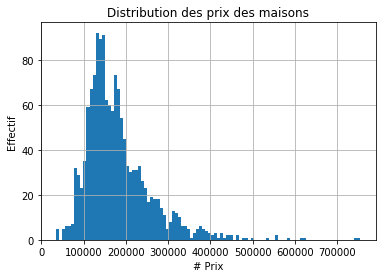

In [9]:
df["SalePrice"].hist(bins=100)
plt.title("Distribution des prix des maisons")
plt.xlabel("# Prix")
plt.ylabel("Effectif")
plt.show()

La cible de notre modèle s'apparente à une log-normale. Elle a pour moyenne 181 K et un écart type de l'ordre de 80 K avec une plage de valeurs compris entre 35 K et 755 K.

### Les autres variables numériques

In [10]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num = df_num.drop(["SalePrice", "Id"], axis = 1)
df_num.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,24.284752,9981.264932,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,59.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,80.000000,11601.500000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AD7E7D1048>,
      dtype=object)

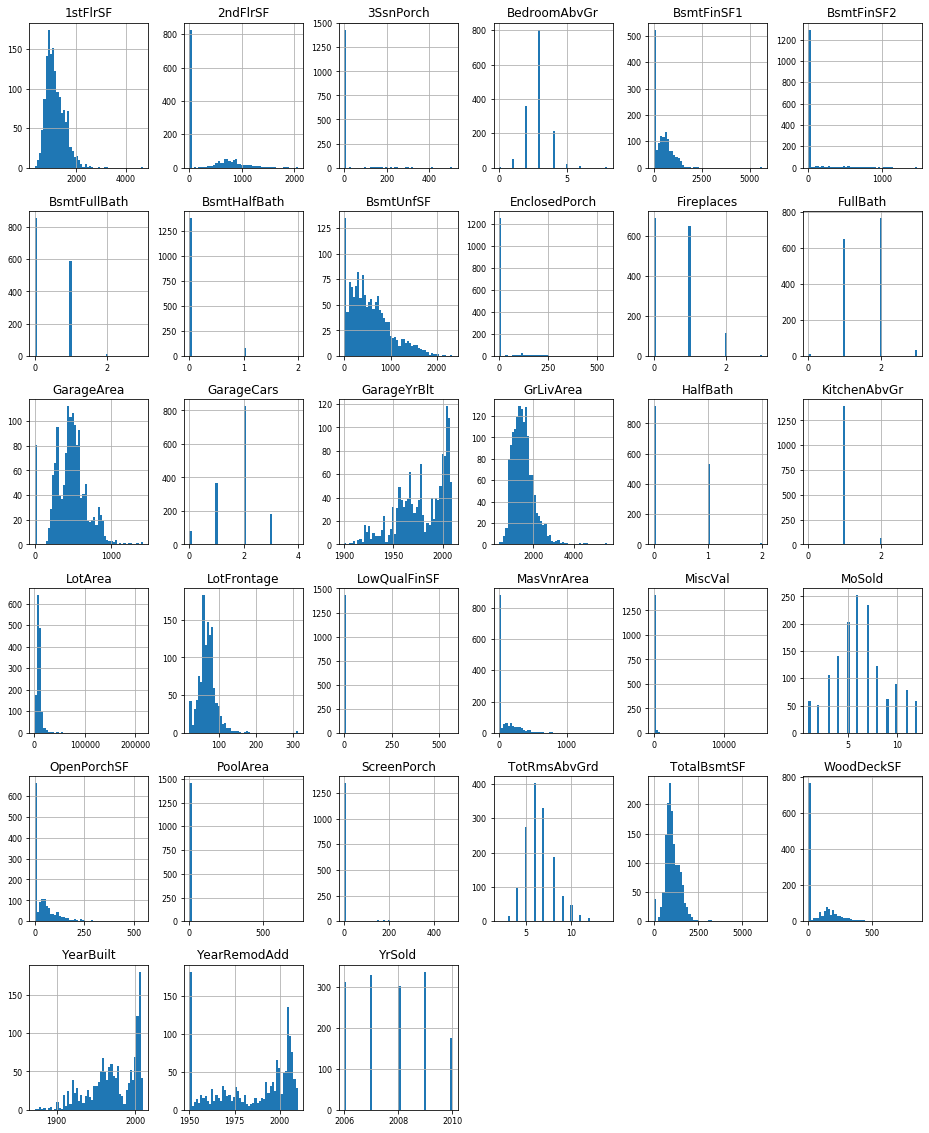

In [11]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

On peut observer :
* sur la **la localisation et les caractéristiques de la propriété**
  * que les variables LotFrontage et LotArea ont une distribution de type LogNormal comme la cible
  * que la variable LotArea a des valeurs extrêmes supérieures
* sur les **informations générales sur la construction**
  * des années de construction entre 1872 et 2010
  * des années de rénovation entre 1950 et 2010
* sur la **la toiture, l'emprise au sol, le sous-sol**
  * que la valeur surface de maçonnerie a des valeurs extrêmes de même que les variables BsmtFinSF1 et BsmtFinSF2 
  * que la variable TotalBsmtSF et BsmtUnfSF ont aussi une distribution de type LogNormal
* sur les caractéristiques de la **maison au-dessus du sous-sol**
  * que la surface habitable a une distribution de type LogNormal
  * que la majorité des maisons ont un étage
  * que le nombre de chambres le plus important en terme de modalités est 3
  * des informations sur les salles de bains, douches, cheminées avec des modalités comprises entre 0 et 3
* sur les **commodités spéciales (piscines, vérandas) et le garage**
  * 2 places de parking est la modalité la plus présente
  * une surface du garage qui suit aussi une loi normale
* sur les **caractéristiques des ventes** :
  * que les années de vente sont comprises entre 2006 et 2010, 
  * que les 12 mois sont représentés avec une gaussienne avec des ventes plus importantes sur l'été

### Les variables catégorielles

In [12]:
df_cat = df.select_dtypes(include = ['category'])

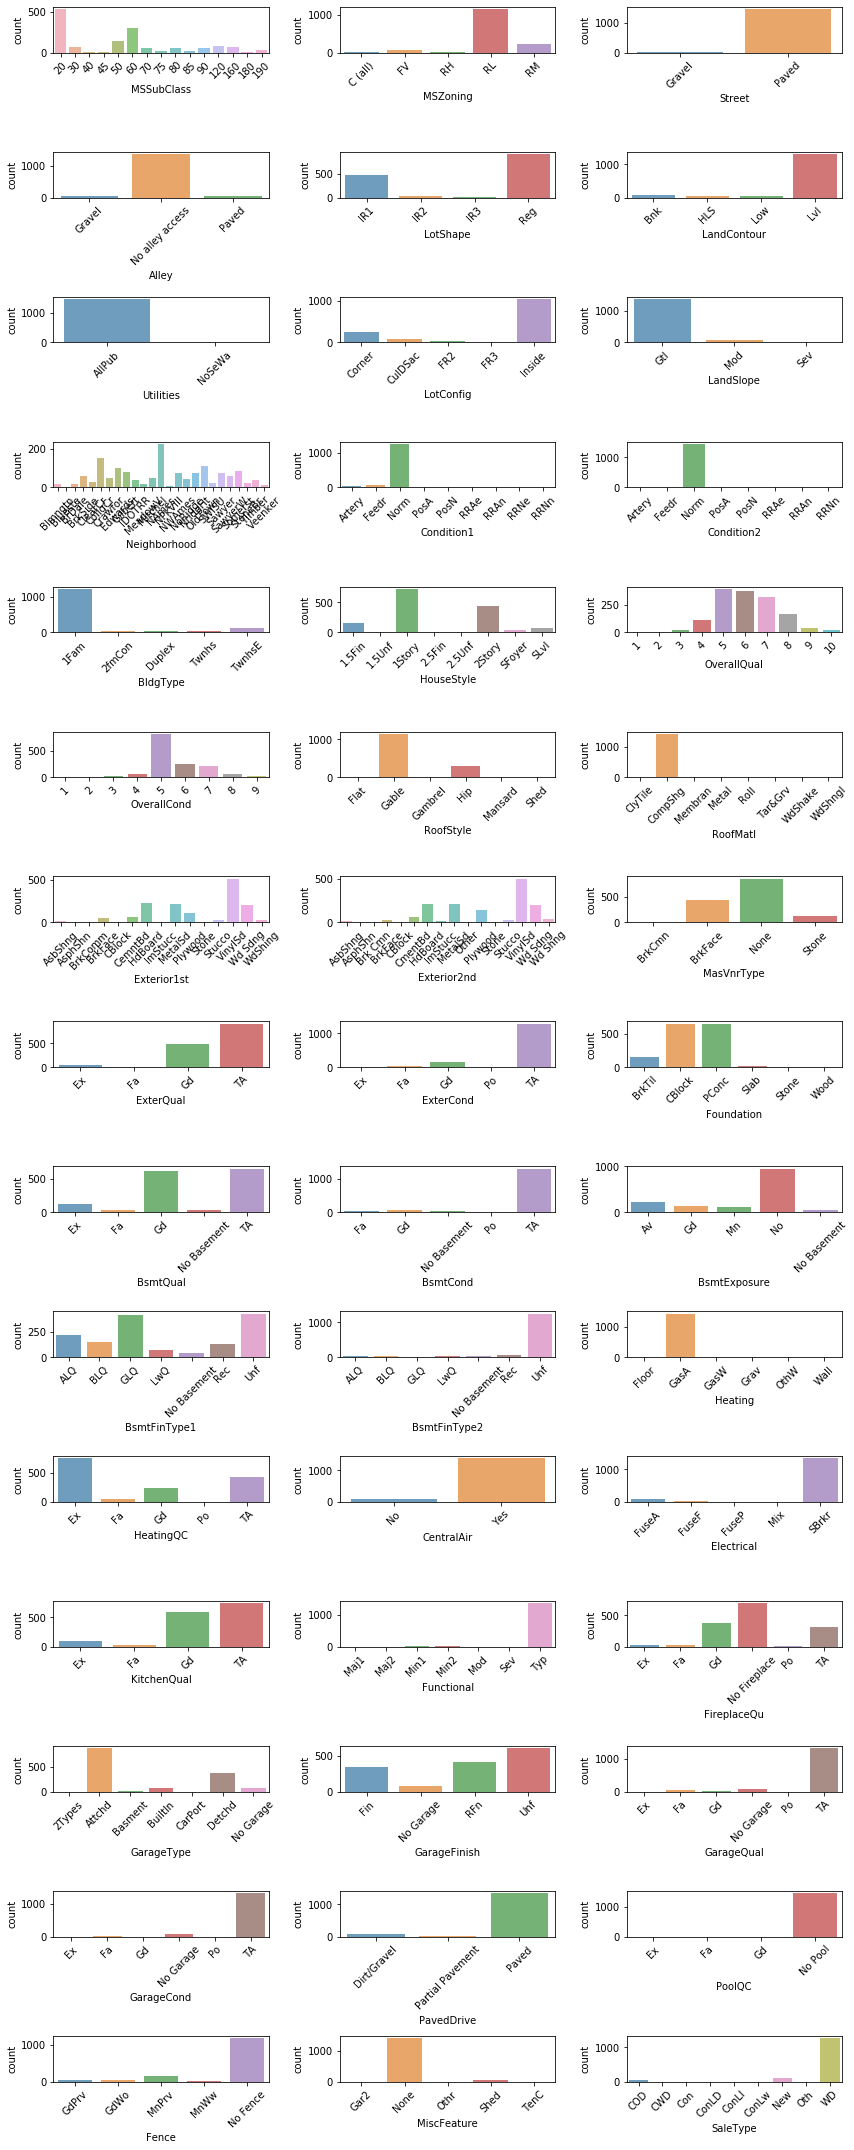

In [13]:
fig, axes = plt.subplots(round(len(df_cat.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_cat.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_cat.columns[i], alpha=0.7, data=df_cat, ax=ax)

fig.tight_layout()

Pour un certain nombre de variables catégorielles, une modalité représente la très grande majorité de l'information. Par conséquent, les variables n'ont pas à être prises en compte dans l'analyse. On pourra ne pas considérer dans le modèle MSZoning, Street, Alley, LandContour, Utilities, LandSlope, Condition1, Condition2, BldgType, RoofMatl, BsmtCond, Heating, BsmtFinType2, CentralAir, Functional, GarageQual, GarageCond, PoolQC,MiscFeature.
On peut observer aussi que la qualité de la finition de la maison s'apparente à une gaussienne.

In [14]:
listDropCategorical = ["MSZoning", "Street", "Alley", "LandContour", "Utilities", "LandSlope", "Condition1", "Condition2", "BldgType", "RoofMatl", "BsmtCond", "Heating", "BsmtFinType2", "CentralAir", "Functional", "GarageQual", "GarageCond", "PoolQC","MiscFeature"]
print("Nombre de variables catégorielles enlevées : " + str(len(listDropCategorical)))
df = df.drop(listDropCategorical, axis = 1)
print("Shape df : " + str(df.shape))

Nombre de variables catégorielles enlevées : 19
Shape df : (1460, 62)


### Conclusion sur l'analyse univariée

On a pu voir que :
* notre cible de prix de vente suit une loi LogNormal
* un certain nombre de variables numériques ont aussi un comportement assez similaire à notre target en termes de distribution
* une élimination naturelle des variables catégorielles n'apportant pas d'informations.

## Analyse bivariée

L'analyse bivariée va consister à regarder l'influence de différentes variables sur la variable cible.

### Les variables quantitatives

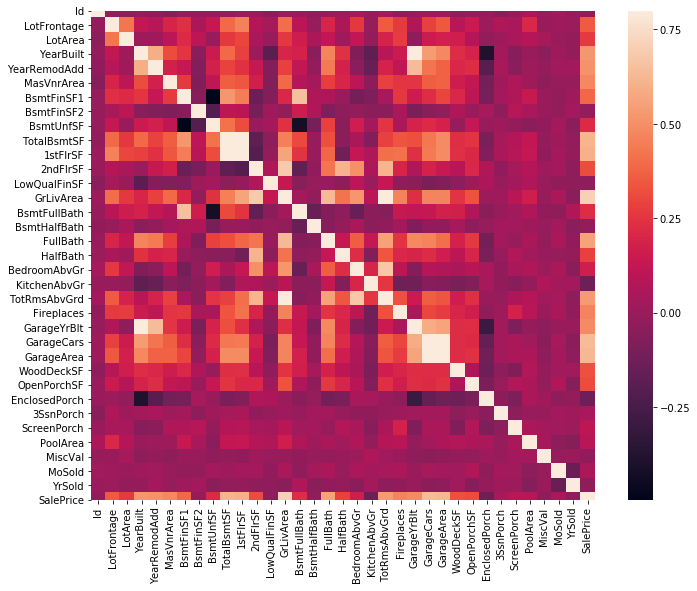

In [15]:
corr = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);

La matrice de corrélation entre les variables quantitatives avec de nombreuses variables permet néanmoins d'extraire des informations intéressantes :
* les variables qui sont très fortement corrélées entre elles : on pourra citer YearBuilt et GarageYrBlt, GarageCars et GarageArea et TotalBsmtSF et 1FstFlrSF. Une des deux variables pourra être ignorée dans le cas de la prédiction car elle transmette une information identique.
* un focus spécifique sur la variable à prédire : on peut observer qu'elle est fortement liée positvieemnt à GrLivArea, TotalBsmtSF, GarageCars pour les plus significatives. Elle a l'air corrélée négativement avec KitchenAbvGr et EnclosedPorch.

In [16]:
dfSalePrice = corr[np.abs(corr['SalePrice'])>0.5]['SalePrice']
dfSalePrice = dfSalePrice.drop('SalePrice')

Text(0, 0.5, 'Corrélation en absolu')

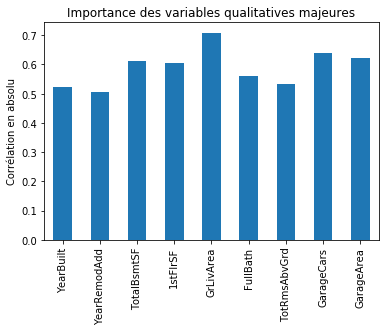

In [17]:
impSalePrice = dfSalePrice.plot(kind="bar")
impSalePrice.set_title("Importance des variables qualitatives majeures")
impSalePrice.set_ylabel("Corrélation en absolu")

On regarde à travers un scatterplot pour visualiser la relation entre les variables numériques les plus significatives (en gardant uniquement une variable si problème de colinéarité) avec la variable cible.

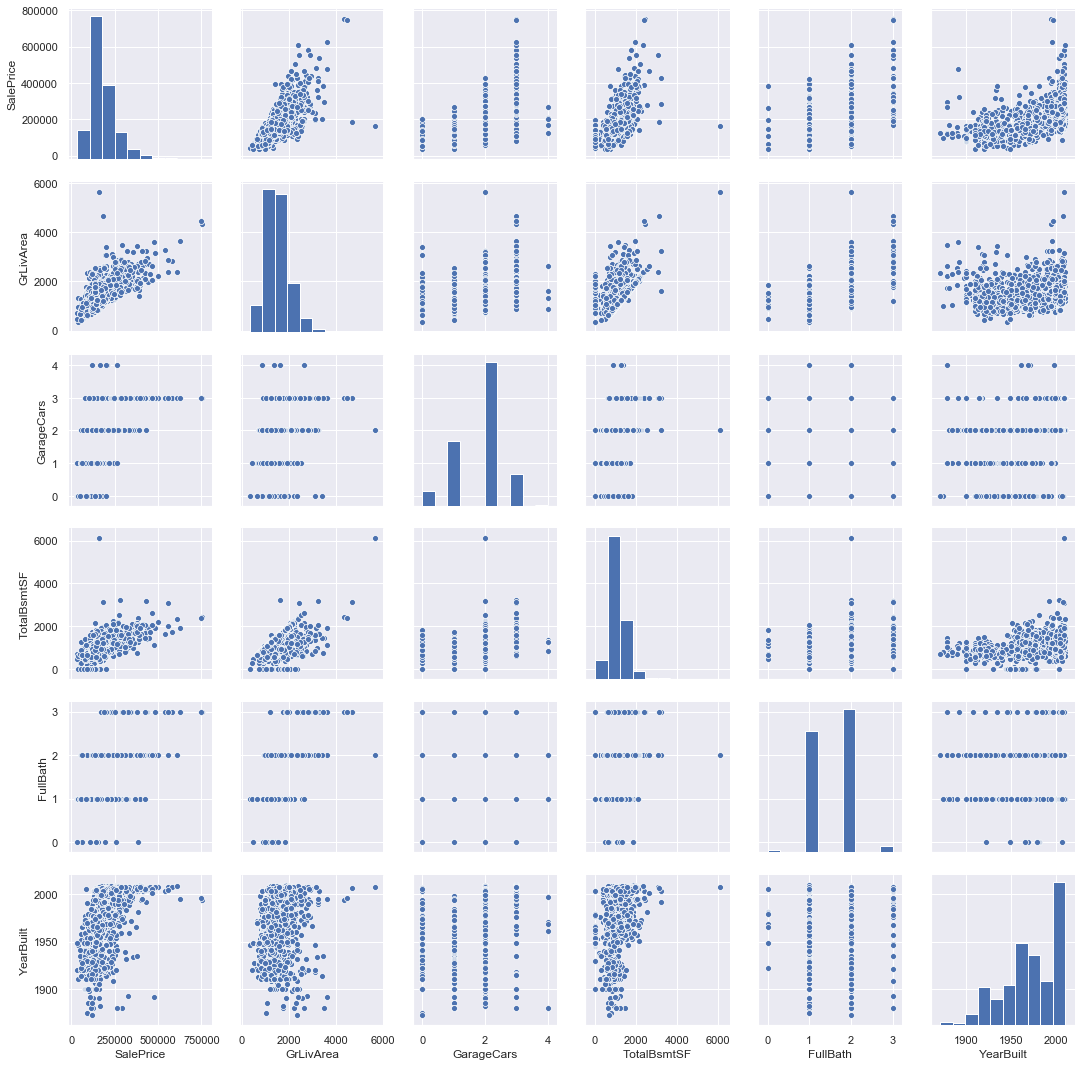

In [18]:
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], height = 2.5)
plt.show();

Le prix de vente semble en tendance évoluer positivement fonction du nombre de places de parkings et de salle de bains (même s'il existe une certaine disparité). Faisons un focus sur des liens entre certaines variables avec la variable cible.

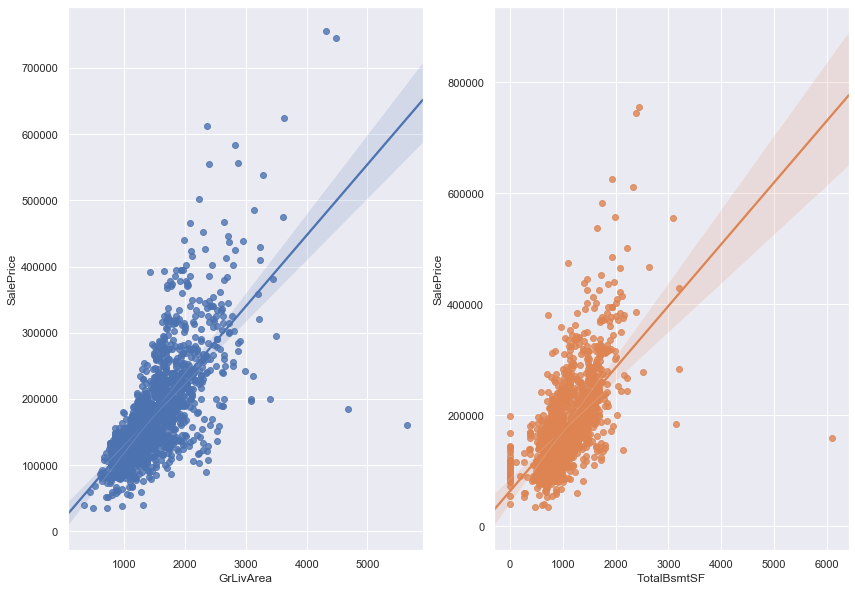

In [19]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(14,10)
sns.regplot(x="GrLivArea",y="SalePrice",data=df, ax=ax1)
sns.regplot(x="TotalBsmtSF",y="SalePrice",data=df,ax=ax2)


Le prix de vente évolue positivement fonction de la surface totale habitable et de l'emprise au sol.

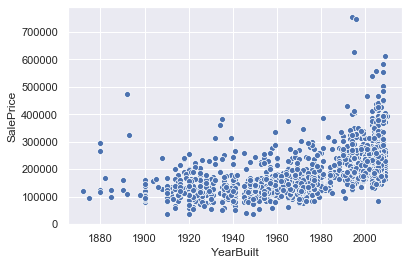

In [20]:
sns.scatterplot(x="YearBuilt",y="SalePrice",data=df)

Le prix de vente semble augmenter en fonction de l'année de construction. Peut-être à prendre avec précaution car nous ne savons pas si les prix de vente sont en prix constant. Dans le cas contraire, cela reflète l'inflation de 1880 à 2010.

### Les variables catégorielles

En croisant les variables catégorielles, il est possible de trouver des relations logiques avec notre cible. Pour certaines analyses, il est nécessaire d'avoir une vision métier supplémentaire par exemple pour la logique géographique au niveau des districts (neighborhood) qui peut faire sens pour une personne connaissance le marché immobilier ou qui nécessiterait d'introduire du featuring engeenering avec le niveau de vie moyen par district.

In [21]:
df_cat = df.select_dtypes(include = ['category'])
df_cat.columns

Index(['MSSubClass', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'Electrical',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish',
       'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

Text(0.5, 1, 'Distribution Prix / Neighborhood')

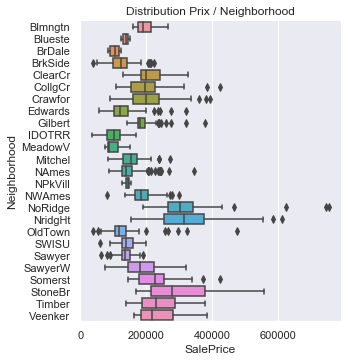

In [22]:
sns.catplot(x="SalePrice", y="Neighborhood", kind="box",data=df)
plt.title("Distribution Prix / Neighborhood")

Text(0.5, 1, 'Distribution Prix / OverallQual')

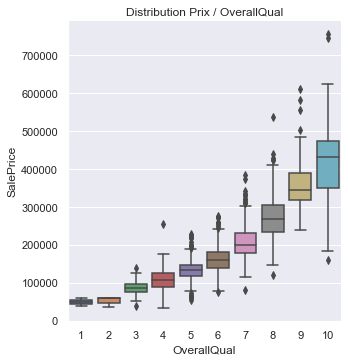

In [23]:
sns.catplot(x="OverallQual", y="SalePrice", kind="box", data=df)
plt.title("Distribution Prix / OverallQual")

On observe de manière naturelle que le prix de vente dépend de l'évaluation de la qualité des matériaux et de la finition de la maison.

Text(0.5, 1, 'Distribution Prix / FireplaceQu')

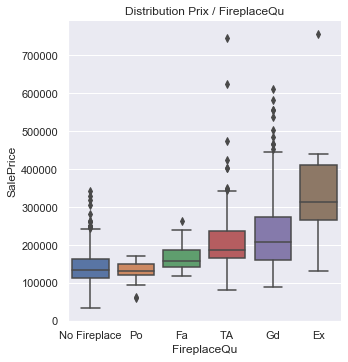

In [24]:
sns.catplot(x="FireplaceQu", y="SalePrice", kind="box", order=["No Fireplace", "Po", "Fa", "TA", "Gd", "Ex"], data=df)
plt.title("Distribution Prix / FireplaceQu")

Les variables avec une échelle de valeur comme FirePlaceQu (KitchenQual, HeatingQC, BsmtExposure,BsmtCond, BsmtQual, ...) ont un prix qui en tendance évolue positivement fonction d'une note élevée fonction du critère étudiée ce qui apparaît logique avec néanmoins des points atypiques. 

### Conclusion sur l'analyse bivariée

La target est sensible : 
* à des variables numériques les plus discriminantes comme la surface, le nombre de places de garage/salle de bain...
* à des variables catégorielles comme des échelles de valeurs allant de mauvais à excellent...
* certaines variables catégorielles peuvent faire sens mais nécessite une expertise métier.

## Analyse multivariée

In [25]:
df["GlobalQuality"] =df["OverallQual"].replace({1:"Mauvais",2:"Mauvais",3:"Faible",4:"Faible",5:"Moyen",6:"Moyen",7:"Bon",8:"Bon",9:"Excellent",10:"Excellent"}) 


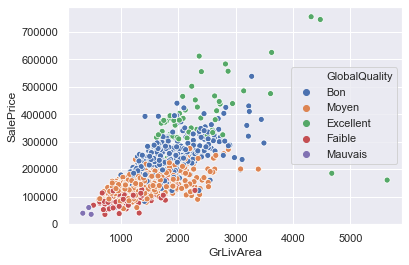

In [26]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="GlobalQuality", data=df)

On peut observer que le prix dépend fortement de la surface et de la qualité de la maison. Les maisons les plus chères sont les plus grandes avec une très bonne notation et inversement.

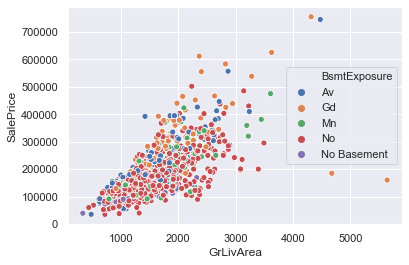

In [27]:
sns.scatterplot(x="GrLivArea", y="SalePrice", hue="BsmtExposure", data=df)

On peut contrairement à l'analyse bivariée voir l'impact de la variable workingday où on a des comportements bien différents avec :
* des pointes très marquées pour les jours travaillés (7/8h et 17 à 19h). 
* Par contre pour les jours non travaillés, on a un usage plus important entre 10h et 20h. 
* On peut aussi voir les intervalles de confiance qui semblent plutôt bons

### Lien entre variables Hour, Count, WorkingDay, Dayofweek

In [ ]:
sns.catplot(x="hour", y="count", hue="workingday",
            col="dayofweek", aspect=.9,
            kind="swarm", data=df);

On retrouve des fonctionnements différents entre les working day. On a des motifs assez similaires du lundi au vendredi lorsque ce sont des jours travaillés avec les pointes pour aller et sortir du travail (cela pourrait s'apparenter à une composition de gaussienne autour des deux pics). Le week-end expose un fonctionnement plus gaussien autour de 14h

### Lien entre variable Hour, Count, et Season

In [ ]:
sns.pointplot(x="hour", y="count", hue="season", join=True, data=df);

On retrouve la saisonnalité intrajournalière avec des niveaux différents suivant les saisons avec une différence forte entre le printemps (location moindre) et les autres saisons

### Conclusion sur l'analyse multivariée

La target est sensible : 
* à des seuils de température et d'humidité
* à la variable workingday avec des fonctionnements différenciés en intraday

# Preprocessing pour scikit-learn¶

In [ ]:
df.info()

## Construction des ensembles X et y à partir du dataframe

Pour notre ensemble de variables explicatives, on supprime datetime, atemp (de part sa corrélation avec temp), count (qui est la target) et on garde l'ensemble des données générées à partir des plages horaires. Dans la variable à expliquer, on a count. On a supprimé aussi la variable season par la suite car elle doit avoir des corrélations très fortes avec Mois et rend les coefficients de la régression linéaire peu interprétables si on la garde

In [ ]:
X = df.drop(["atemp", "count","datetime","season"], axis = 1)
y = df["count"]
print(f"Shape de X : {X.shape}")
print(f"Shape de y : {y.shape}")
X.head(5)

## Preprocessing sur les variables catégorielles

In [ ]:
categorical_features = X.columns[X.dtypes == "category"].tolist()
print(categorical_features)

Scikit-learn ne reconnait pas les objets de type DataFrame directement, notamment les types catégoriels. Il faut donc préparer nos données afin que les méthodes de scikit-learn puissent les interpréter. Scikit learn requiert un encodage numérique des ces variables. Nous allons donc devoir encoder nos variables explicatives catégorielles à l'aide de variables indicatrices.

In [ ]:
df_dummies =  pd.get_dummies(X[categorical_features], drop_first=True)
X = pd.concat([X.drop(categorical_features, axis=1), df_dummies], axis=1)
X.head(5)

J'avais essayé d'utiliser OneHotEncoder pour faire la dummificationet combiner avec un pipe pour la standardisation mais cela n'a pas fonctionné comme je le souhaitais. Je suis resté à la méthode plus artisanale de dummification via Panda

In [ ]:
#from sklearn.preprocessing import OneHotEncoder
#enc = OneHotEncoder(sparse =False)
#enc.fit(X)
#X = enc.transform(X)
#X

## Train, Test

Nous utilisons scikit-learn pour faire le traitement et étant donné la volumétrie du jeu de données, nous allons prendre 80% pour le train et 20% pour le test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)
print(f"Shape du X_train : {X_train.shape}")
print(f"Shape du y_train : {y_train.shape}")
print(f"Shape du X_test : {X_test.shape}")
print(f"Shape du y_test : {y_test.shape}")

## Preprocessing sur les variables numériques

In [ ]:
numerical_features = df.columns[(df.dtypes == "int64")].tolist() + df.columns[(df.dtypes == "float64")].tolist()
print(numerical_features)


Certaines méthodes d'apprentissage sont sensibles aux problèmes d'échelle sur les valeurs numériques. En preprocessing, on standardise les variables numériques en retranchant leur moyenne et en divisant par l'écart type via Scikit-learn. On réalise ce traitement sur l'ensemble d'apprentissage et on applique cette standardisation sur l'ensemble de test.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#scaled_numeric = scaler.fit_transform(df[numerical_features])
#df_numeric = pd.DataFrame(scaled_numeric,columns=numerical_features)

# Un modèle simple : la régression linéaire

Un premier modèle qui nous servira de *baseline*.

Nous allons aussi introduire l'imputation sur les données sur les données *train*, que nous appliquerons **ENSUITE** sur les données *test*.

## Modèle de regression sur Train/Test
$$y =\sum_{i=1}^{n} a_i \times x_i + b$$

In [ ]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

reg.fit(X_train_scaled, y_train)
y_trainPred = reg.predict(X_train_scaled)
y_testPred = reg.predict(X_test_scaled)
print(f"Score sur le train : {reg.score(X_train_scaled,y_train)}")
print(f"Score sur le test : {reg.score(X_test_scaled,y_test)}")

## Coefficients de la régression linéaire

Un des avantages de la régression linéaire est que nous pouvons obtenir les coefficients associés à chacune des variables. Nous pouvons voir les coefficients qui ont un impact sur le nombre de vélos loués.

Regardons ces coefficients :

In [ ]:
coefficients = pd.Series(reg.coef_.flatten(), index=X.columns).sort_values(ascending=False)
coefficients

In [ ]:
print(f"ordonnee à l'origine : {reg.intercept_}")

In [ ]:
coefficients[np.abs(coefficients)>10].plot(kind="bar")
plt.title("Regression lineaire coefficient")
plt.ylabel("Coefficient value")
plt.show()

Pour arriver à des coefficients interprétables, on a enlevé la colinéarité entre les variables :
* en faisant une dummification à n-1 modalités
* de manière empirique en enlevant la saison qui doit être fortement corrélée avec les mois

On observe en cohérence avec notre exploration que la location à travers une régression linéaire est :
* très fortement liée aux heures importantes de la journée (les pics), 
* la variable year_2012 doit jouer sur le niveau
* la température
* les mois dans une moindre mesure
* de manière négative l'humidité et un temps pluvieux ou neige 

## Evaluation de la régression avec différentes métriques

Nous allons regarder quelques métriques associées aux problématiques de régression :
* L'erreur maximum entre la prédiction et la réalité
* La moyenne des erreurs absolus entre la prédiction et la réalité
* La moyenne des erreurs au carré entre la prédiction et la réalité (MSE)
* Le score R2 qui est le coefficient de détermination en comparant MSE et la variance. Fonction renvoyée par la méthode score de Scikit Learn

In [ ]:
from sklearn import metrics


def regression_metrics(y, y_pred):
    return pd.DataFrame(
        {
            "max_error": metrics.max_error(y_true=y, y_pred=y_pred),
            "mean_absolute_error": metrics.mean_absolute_error(y_true=y, y_pred=y_pred),
            "mean_squared_error": metrics.mean_squared_error(y_true=y, y_pred=y_pred),
            "r2_score": metrics.r2_score(y_true=y, y_pred=y_pred)
        },
        index=[0])

In [ ]:
print("Regression metrics for train data")
print(regression_metrics(y_train, y_trainPred))
print("Regression metrics for test data")
print(regression_metrics(y_test, y_testPred))

In [ ]:
pd.concat(
    [
        regression_metrics(y_train, y_trainPred).T[0].rename("train"),
        regression_metrics(y_test, y_testPred).T[0].rename("test")
    ],
    axis=1).plot(kind="bar")
plt.title("Regression metrics")
plt.ylabel("Metric")
plt.show()

Il n'y a pas d'overfitting et d'underfitting et on a une qualité de la regression linéaire qui prédit très moyennement la location de vélo. Les modèles linéaires ne modélisent pas bien la série temporelle de location horaire de vélos

# Arbre de décision et visions ensemblistes

## Arbre de décision

In [ ]:
from sklearn.tree import DecisionTreeRegressor
decisionTree = DecisionTreeRegressor()
decisionTree.fit(X_train_scaled, y_train)
y_trainPred = decisionTree.predict(X_train_scaled)
y_testPred = decisionTree.predict(X_test_scaled)
print(f"Score sur le train de l'arbre de décision : {decisionTree.score(X_train_scaled,y_train)}")
print(f"Score sur le test de l'arbre de décision : {decisionTree.score(X_test_scaled,y_test)}")


In [ ]:
print("Regression metrics with Decision Tree for train data")
print(regression_metrics(y_train, y_trainPred))
print("Regression metrics with Decision Tree for test data")
print(regression_metrics(y_test, y_testPred))

On est dans un cas de surapprentissage puisque l'arbre de décision "fit" complètement à l'ensemble de train mais ne se généralise pas bien sur l'ensemble de test. Néanmoins la performance est tout de même meilleure que la régression linéaire

In [ ]:
print("Feature importances : \n{}".format(decisionTree.feature_importances_))

In [ ]:
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align = 'center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1,n_features)

In [ ]:
plot_feature_importances(decisionTree)

On ne voit pas véritablement les features importantes dans la régression réalisée sur l'arbre aux vues de la dimension de nos variables explicatives. On va filtrer les valeurs supérieures à 0.03 pour identifier les variables qui ont un poids dans la prédiction de la cible

In [ ]:
featuresImportance = pd.Series(decisionTree.feature_importances_.flatten(), index=X.columns).sort_values(ascending=False)
featuresImportance[(featuresImportance)>0.03].plot(kind="bar")
plt.title("Feature")
plt.ylabel("Feature Importance")
plt.show()

On retrouve des éléments par rapport à l'analyse exploratoire avec une importance donnée à la température, l'humidité, le fait de travailler ou non (fonctionnement différent), les heures de pointes et l'année.

In [ ]:
for depth in range(5,20):
    decisionTreeMaxDepth = DecisionTreeRegressor(max_depth=depth)
    decisionTreeMaxDepth.fit(X_train_scaled, y_train)
    print(f"Max depth : {depth}")
    print(f"Score sur le train de l'arbre de décision : {decisionTreeMaxDepth.score(X_train_scaled,y_train)}")
    print(f"Score sur le test de l'arbre de décision : {decisionTreeMaxDepth.score(X_test_scaled,y_test)}")

On observe assez vite le surapprentissage lorsqu'on augmente la profondeur de l'arbre

Avantages : 
* On peut contrôler la complexité de l'arbre en jouant sur des paramètres avec la prondeur ou des stratégies d'élagage
* Interprétabilité des décisions
* Pas de problématique de prise en compte des échelles différentes entre les variables (même si dans notre cas, nous travaillons sur des données standardisées)

Inconvénient majeur :
* Même en jouant sur la complexité de l'arbre, un arbre tend au surapprentissage et fournit de piètre performance de généralisation

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
nbTree = 100
print(f"Nombre d'arbres considérés : {nbTree}")
for depth in [5,10,15,20,30, 40]:
    randomForest = RandomForestRegressor(n_estimators=nbTree, random_state=2, max_depth=depth)
    randomForest.fit(X_train_scaled, y_train)
    print(f"--- Max depth : {depth}")
    print(f"---------Score sur le train avec RandomForest : {randomForest.score(X_train_scaled,y_train)}")
    print(f"---------Score sur le test avec RandomForest : {randomForest.score(X_test_scaled,y_test)}")

On observe avec Random Forest une amélioration du score fonction de la profondeur considérées avec un surapprentissage si celle-ci devient importante. Dans le cas actuel, une profondeur de 15 semble cohérente

## GridSearch et Validation croisée

Nous allons creuser un peu plus loin afin d'améliorer RandomForest en optimisant les hyperparamètres du modèle. Pour ce faire nous allons procéder par validation croisée avec 5 plis sur l'ensemble d'apprentissage. 
A l'aide de celle-ci, nous allons chercher quel(s) paramètre(s) nous donne(nt) le meilleur score et enfin nous évaluerons la qualité du modèle sur le jeu de données test.

Les paramètres que nous allons chercher à optimiser dans RandomForest sont :
* le paramètre max_depth qui correspond à la profondeur de l'arbre 
* le nombre d'arbres à considérer dans la forêt
* le nombre de features maximale à considérer

In [ ]:
from sklearn.model_selection import GridSearchCV
# grille de valeurs
params = [{"max_depth": [10,15,20], "n_estimators": [100,200,300,500], "max_features": [12, 15, 20, 25]}]

gridSearchCV = GridSearchCV(
    RandomForestRegressor(),
    params,
    cv=5,
    n_jobs=-1,
    return_train_score=True)
gridSearchCV.fit(X_train_scaled, y_train)

In [ ]:
print("Score sur le test : {:.2f}".format(gridSearchCV.score(X_test_scaled,y_test)))

In [ ]:
print("Best parameters : {}".format(gridSearchCV.best_params_))
print("Best cross-validation score : {:.2f}".format(gridSearchCV.best_score_))

In [ ]:
print("Best estimator:\n{}".format(gridSearchCV.best_estimator_))

In [ ]:
plot_feature_importances(gridSearchCV.best_estimator_)

In [ ]:
featuresImportance = pd.Series(gridSearchCV.best_estimator_.feature_importances_.flatten(), index=X.columns).sort_values(ascending=False)
featuresImportance[(featuresImportance)>0.03].plot(kind="bar")
plt.title("Feature")
plt.ylabel("Feature Importance")
plt.show()

A travers une validation croisée et un grid search, on obtient un paramétrage via Random Forest et on peut visualiser les variables qui ont de l'importance. On retrouve des variables explicatives en lien avec notre analyse exploratoire. On est aussi dans un cas où il n'y a pas de surapprentissage. 

In [ ]:
y_testPred = gridSearchCV.best_estimator_.predict(X_test_scaled)
print("Regression metrics pour la forêt aléatoire optimisée for test data")
print(regression_metrics(y_test, y_testPred))

# Conclusion

## Sur le travail réalisé
* L'analyse univariée et multivariée ont permis de mettre en évidence des liens entre les variables explicatives et à expliquer
* Le featuring Ingeenering a été un travail réalisé sur les dates pour essayer de voir les liens avec la variable à prédire.
* Les modèles linéaires ne se comportent pas très bien car le comportement de la série temporelle n'est pas linéaire.
* Un modèle basé sur des arbres de décision permet d'obtenir des meilleurs résultats par rapport à la regression linéaire. Une optimisation des paramètres a pu être mise en oeuvre via validation croisée et grille de recherche

## Sur les perspectives
* Sur le code : la mise en place de Pipe avec l'utilisation de OneHotEncoder et StandardScaler.
* Sur les modèles : tester d'autres modèles pour améliorer la prévision. On peut penser à une régression polynomiale ou boosting d'arbres de régression, ou des modèles traitant spécifiquement de séries temporelles.
* Un traitement des points atypiques pourrait peut-être aussi améliorer les prédictions.